In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

voltage_df = pd.read_csv('HW7_voltage.csv')
poly_df = pd.read_csv('HW7_poly.csv')
pressure_df = pd.read_csv('HW7_pressure.csv')
depth_df = pd.read_csv('HW7_depth.csv')

# Problem 1

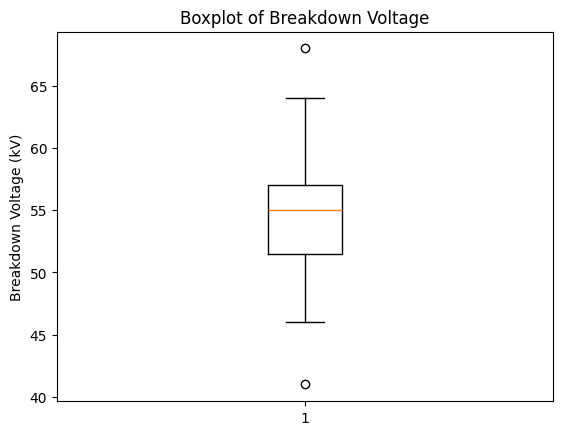

count    48.000000
mean     54.708333
std       5.230672
min      41.000000
25%      51.500000
50%      55.000000
75%      57.000000
max      68.000000
Name: Value, dtype: float64
95% Confidence Interval: (53.19, 56.23)
Required sample size: 217.0


In [12]:
# Boxplot
plt.boxplot(voltage_df['Value'])
plt.ylabel('Breakdown Voltage (kV)')
plt.title('Boxplot of Breakdown Voltage')
plt.show()

# Optional: Summary statistics to comment on features
summary = voltage_df['Value'].describe()
print(summary)

# Calculate mean and standard error
sample_mean = voltage_df['Value'].mean()
sample_std = voltage_df['Value'].std(ddof=1)
n = len(voltage_df)

# t-critical value
t_crit = stats.t.ppf(1 - 0.025, df=n - 1)

# Confidence interval
margin_error = t_crit * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Desired margin of error
E = 1  # kV

# Estimated sigma
sigma = (70 - 40) / 4

# z-critical value for 95% confidence
z_crit = stats.norm.ppf(1 - 0.025)

# Required sample size
n_required = (z_crit * sigma / E) ** 2
n_required = np.ceil(n_required)

print(f"Required sample size: {n_required}")

# Problem 2

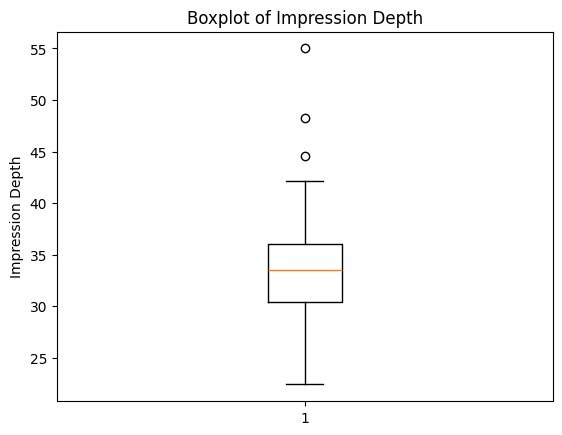

{'mean': np.float64(33.36987951807229), 'median': np.float64(33.5), 'std_dev': np.float64(5.268306872457247), 'min': np.float64(22.4), 'max': np.float64(55.0), 'Q1': np.float64(30.45), 'Q3': np.float64(36.0)}


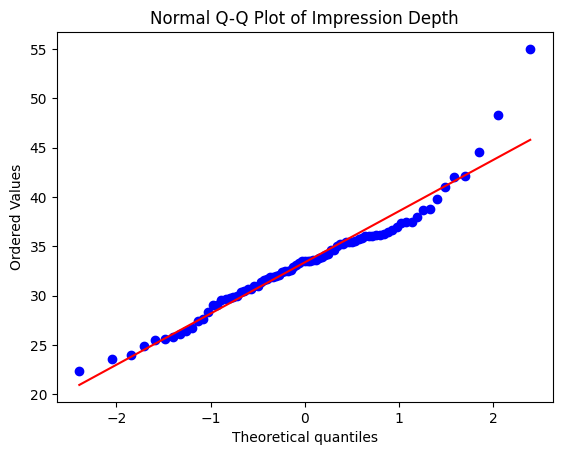

99% Upper Confidence Bound for μ: 34.7419


In [13]:
depth_values = np.array(depth_df['Value'])
plt.boxplot(depth_values)
plt.ylabel('Impression Depth')
plt.title('Boxplot of Impression Depth')
plt.show()

# Optional: Summary statistics
summary = {
    'mean': np.mean(depth_values),
    'median': np.median(depth_values),
    'std_dev': np.std(depth_values, ddof=1),
    'min': np.min(depth_values),
    'max': np.max(depth_values),
    'Q1': np.percentile(depth_values, 25),
    'Q3': np.percentile(depth_values, 75)
}
print(summary)

# Q-Q plot
stats.probplot(depth_values, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Impression Depth')
plt.show()

# Sample statistics
sample_mean = np.mean(depth_values)
sample_std = np.std(depth_values, ddof=1)
n = len(depth_values)

# t-critical value for one-sided 99% bound
t_crit = stats.t.ppf(0.99, df=n-1)

# Upper confidence bound
upper_bound = sample_mean + t_crit * (sample_std / np.sqrt(n))

print(f"99% Upper Confidence Bound for μ: {upper_bound:.4f}")

the points are along the line so we can persume normality, and normality is neeeded to use t-distribution for CI if n was less than 30 but our n is bigger
the box is narrow there are a few outliers 
With 99% confidence, we can state that the true average impression depth (μ) is less than or equal to 34.7419 units

# Problem 3

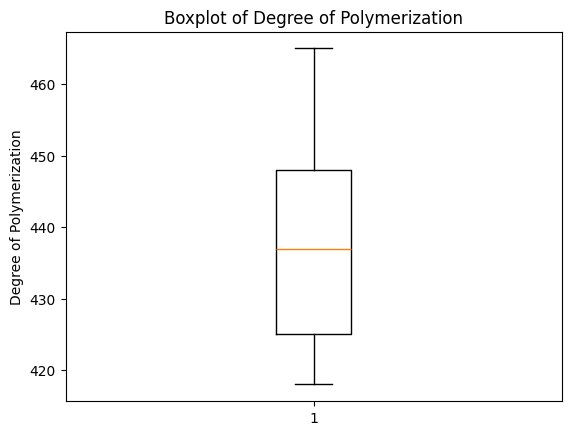

{'mean': np.float64(438.29411764705884), 'median': np.float64(437.0), 'std_dev': np.float64(15.144160202378147), 'min': np.int64(418), 'max': np.int64(465), 'Q1': np.float64(425.0), 'Q3': np.float64(448.0)}


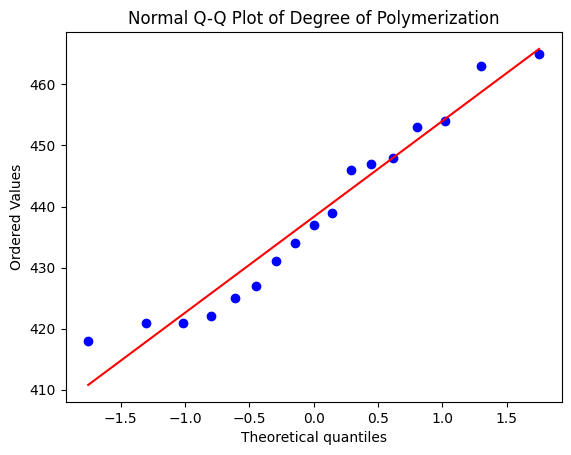

95% Confidence Interval: (430.51, 446.08)
440 is a plausible value for the true mean.
450 is NOT a plausible value for the true mean.


In [14]:
polymerization_values = np.array(poly_df['Value'])

plt.boxplot(polymerization_values)
plt.ylabel('Degree of Polymerization')
plt.title('Boxplot of Degree of Polymerization')
plt.show()

# Optional: Summary statistics
summary = {
    'mean': np.mean(polymerization_values),
    'median': np.median(polymerization_values),
    'std_dev': np.std(polymerization_values, ddof=1),
    'min': np.min(polymerization_values),
    'max': np.max(polymerization_values),
    'Q1': np.percentile(polymerization_values, 25),
    'Q3': np.percentile(polymerization_values, 75)
}
print(summary)

# Q-Q Plot
stats.probplot(polymerization_values, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Degree of Polymerization')
plt.show()

# Sample statistics
sample_mean = np.mean(polymerization_values)
sample_std = np.std(polymerization_values, ddof=1)
n = len(polymerization_values)

# t-critical value for 95% CI
t_crit = stats.t.ppf(1 - 0.025, df=n - 1)

# Confidence interval
margin_error = t_crit * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Check if 440 or 450 are within the interval
if 440 >= ci_lower and 440 <= ci_upper:
    print("440 is a plausible value for the true mean.")
else:
    print("440 is NOT a plausible value for the true mean.")

if 450 >= ci_lower and 450 <= ci_upper:
    print("450 is a plausible value for the true mean.")
else:
    print("450 is NOT a plausible value for the true mean.")


The points are along the linear line so it is plausible they are used from a normal distribution 

# Problem 4

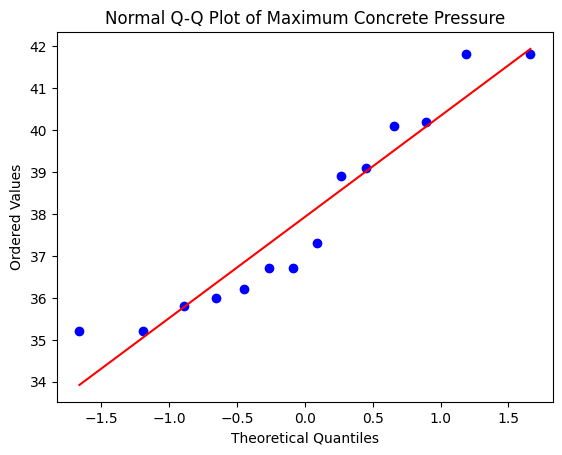

Sample standard deviation: 2.3486
95% Upper Confidence Bound for σ: 3.4887


In [15]:
pressure_values = np.array(pressure_df['Value'])

# Q-Q Plot
stats.probplot(pressure_values, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Maximum Concrete Pressure')
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical Quantiles')
plt.show()

# Sample statistics
n = len(pressure_values)
sample_std = np.std(pressure_values, ddof=1)
alpha = 0.05

# Chi-squared critical value for upper bound
chi2_crit = stats.chi2.ppf(alpha, df=n - 1)

# Upper confidence bound for standard deviation
upper_bound_std = np.sqrt((n - 1) * sample_std**2 / chi2_crit)

print(f"Sample standard deviation: {sample_std:.4f}")
print(f"95% Upper Confidence Bound for σ: {upper_bound_std:.4f}")
